<a href="https://colab.research.google.com/github/Yashaswini-Lankalapalli/Hand-Written-Digit-Prediction-/blob/main/YBI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand-Written Digit Prediction - Classification Analysis
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.
#Import Library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data

In [25]:
from sklearn.datasets import load_digits
df=load_digits()

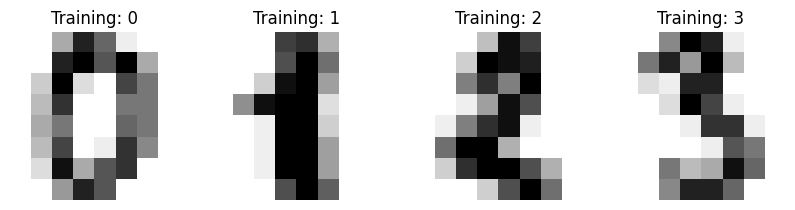

In [26]:
_,axes= plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

#Data Preprocessing
###Flatten Image
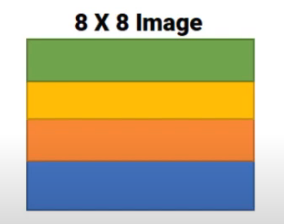
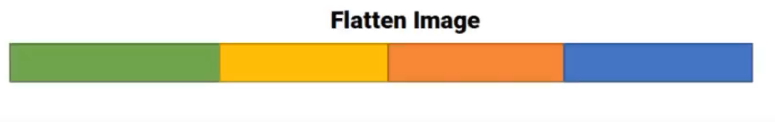

In [27]:
df.images.shape

(1797, 8, 8)

In [28]:
df.images[0].shape

(8, 8)

In [29]:
len(df.images)

1797

In [30]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [31]:
data[0].shape

(64,)

In [32]:
data.shape

(1797, 64)

#Scaling Image Data

In [33]:
data.min(),data.max()

(0.0, 16.0)

In [34]:
data=data/16
data.min(),data.max()

(0.0, 1.0)

In [35]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train Test Split Data

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#Modeling
##Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

#Prediction

In [39]:
y_pred=rf.predict(x_test)
y_pred

array([9, 1, 7, 8, 5, 6, 9, 7, 5, 6, 1, 4, 1, 2, 0, 9, 5, 1, 6, 1, 5, 7,
       7, 4, 9, 0, 8, 4, 3, 6, 3, 4, 4, 7, 3, 1, 2, 6, 1, 4, 7, 3, 7, 7,
       7, 8, 2, 8, 8, 2, 2, 6, 8, 0, 6, 6, 1, 4, 3, 9, 5, 8, 1, 8, 6, 1,
       5, 4, 7, 3, 8, 6, 1, 7, 3, 2, 9, 0, 3, 8, 0, 9, 9, 6, 0, 1, 3, 5,
       6, 9, 8, 2, 8, 4, 8, 4, 4, 3, 1, 8, 3, 0, 8, 6, 4, 2, 6, 6, 4, 2,
       5, 6, 7, 2, 4, 1, 3, 8, 1, 4, 2, 9, 4, 1, 5, 4, 8, 4, 8, 5, 6, 0,
       8, 7, 2, 6, 8, 6, 9, 0, 5, 7, 7, 4, 1, 0, 3, 3, 8, 3, 1, 8, 7, 4,
       0, 2, 3, 2, 7, 9, 3, 3, 1, 0, 9, 9, 2, 6, 0, 2, 0, 0, 6, 5, 8, 0,
       7, 5, 0, 6, 7, 6, 9, 9, 2, 8, 2, 1, 7, 5, 3, 3, 5, 8, 7, 5, 8, 0,
       8, 2, 6, 8, 9, 7, 3, 3, 8, 0, 5, 5, 6, 6, 0, 1, 9, 5, 6, 3, 5, 8,
       0, 5, 6, 1, 0, 1, 9, 7, 2, 4, 5, 5, 1, 7, 7, 5, 7, 0, 2, 3, 3, 0,
       3, 6, 2, 9, 5, 4, 6, 7, 0, 8, 7, 7, 6, 3, 2, 5, 7, 9, 5, 5, 0, 9,
       5, 7, 0, 4, 6, 5, 6, 4, 2, 2, 4, 2, 7, 1, 7, 5, 7, 8, 8, 8, 8, 0,
       6, 2, 6, 3, 1, 3, 7, 8, 6, 7, 1, 3, 3, 9, 5,

#Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 52,  0,  3,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 47,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 1,  3,  1,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 57]])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.89      1.00      0.94        49
           2       0.98      1.00      0.99        45
           3       1.00      0.90      0.95        58
           4       1.00      0.94      0.97        50
           5       0.93      0.98      0.96        56
           6       1.00      0.98      0.99        57
           7       0.95      1.00      0.97        57
           8       0.96      0.91      0.93        53
           9       0.97      0.95      0.96        60

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



#Explaination
Theabove machine learning model demonstrates a complete workflow for building and evaluating a machine learning model to classify handwritten digits using the `load_digits` dataset from scikit-learn. The process begins with importing essential libraries, including `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib` for visualization, and various scikit-learn modules for machine learning. The dataset, which includes images of handwritten digits, is loaded and visualized using `matplotlib` to display a sample of four digit images along with their labels.

The images are then preprocessed for model training. Each image, originally in a 2D array format, is reshaped into a 1D array, resulting in a feature matrix where each row represents a flattened image. The pixel values are normalized by dividing by 16 to scale them to a range between 0 and 1. After preprocessing, the data is split into training and testing sets with 30% of the data allocated for testing using `train_test_split`. A RandomForestClassifier is employed as the model to train on the training set and make predictions on the test set.

In conclusion, the RandomForestClassifier achieved notable performance on the digit classification task. The model's predictions are evaluated using a confusion matrix and a classification report. The classification report reveals an overall accuracy of 97%, indicating that the model correctly classified 97% of the test samples. The report also shows precision, recall, and F1-scores for each digit class, further highlighting the model's effectiveness. This high accuracy demonstrates the model’s strong ability to generalize and accurately predict handwritten digits based on the given dataset.